In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##  Задания:



<b>1.</b> Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

<b>2.</b> Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

<b>3.</b> По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

<b>4.</b> Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

<b>5.</b> Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.. (15 баллов)

<b>6.</b> Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. (23 балла)

## Описание данных:


<b>customer_id</b> — позаказный идентификатор пользователя

<b>customer_unique_id</b> —  уникальный идентификатор пользователя  (аналог номера паспорта)

<b>customer_zip_code_prefix</b> —  почтовый индекс пользователя

<b>customer_city</b> —  город доставки пользователя

<b>customer_state</b> —  штат доставки пользователя

<b>order_id</b> —  уникальный идентификатор заказа (номер чека)

<b>customer_id</b> —  позаказный идентификатор пользователя

<b>order_status</b> —  статус заказа

<b>order_purchase_timestamp</b> —  время создания заказа

<b>order_approved_at</b> —  время подтверждения оплаты заказа

<b>order_delivered_carrier_date</b> —  время передачи заказа в логистическую службу

<b>order_delivered_customer_date</b> —  время доставки заказа

<b>order_estimated_delivery_date</b> —  обещанная дата доставки

<b>order_id</b> —  уникальный идентификатор заказа (номер чека)

<b>order_item_id</b> —  идентификатор товара внутри одного заказа

<b>product_id</b> —  ид товара (аналог штрихкода)

<b>seller_id</b> — ид производителя товара

<b>shipping_limit_date</b> —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

<b>price</b> —  цена за единицу товара

<b>freight_value</b> —  вес товара


## Уникальные статусы заказов:

<ul>
<li><b>created</b> —  создан</li>

<li><b>approved</b> —  подтверждён</li>

<li><b>invoiced</b> —  выставлен счёт</li>

<li><b>processing</b> —  в процессе сборки заказа</li>

<li><b>shipped</b> —  отгружен со склада</li>

<li><b>delivered</b> —  доставлен пользователю</li>

<li><b>unavailable</b> —  недоступен</li>

<li><b>canceled</b> —  отменён</li>
</ul>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-leskov/first_project/olist_customers_dataset.csv')
df2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-leskov/first_project/olist_order_items_dataset.csv')
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-leskov/first_project/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [4]:
#Объединяем сначала 1 и 3 датафрейм по колонке customer_id, затем полученый датафрейм объединяем с оставшимся (со вторым) по order_id
dfs = pd.merge (df1, df3, on='customer_id')
df = pd.merge (dfs,df2, on='order_id')


In [5]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [6]:
# Проверим, в каких столбцах есть пропущеные значения, чтобы учесть этот фактор при работе с этими колонками 
df.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)


In [7]:
df.query('order_id == "00143d0f86d6fbd9f9b38ab440ac16f5"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
65964,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,00143d0f86d6fbd9f9b38ab440ac16f5,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
65965,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,00143d0f86d6fbd9f9b38ab440ac16f5,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
65966,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,00143d0f86d6fbd9f9b38ab440ac16f5,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [8]:
# смотрим количество уникальных идентификаторов заказа
df.order_id.nunique()

98666

In [9]:
# удаляем дубликаты, чтобы в дф оставить только уникальные идентификаторы заказа
# как видно из примера структуры данных по определенному уникальному идентификатору заказа, он повторяется с каждым идентификатором товара внутри одного заказа
# для этого и требуется удаление дубликатов
unique_orders = df.drop_duplicates(['order_id'])
unique_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [10]:
# в качестве покупки мы берем товары, со статусом "доставлен пользователю", так как после других этапов может последовать статус "отменён", что не может являться покупкой
delivered_order = unique_orders.query('order_status == "delivered"')
delivered_order

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [11]:
# по уникальнjму идентификатору пользователя определеям, сколько каждый пользователь сделал заказов
count_buyer = delivered_order.groupby('customer_unique_id').agg({'order_id': 'count'}).query('order_id == 1').count()
count_buyer

order_id    90557
dtype: int64


## ОТВЕТ: 90557 пользователей совершили 1 заказ



### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [12]:
# Не доставлеными заказами будем считать те, которые оплачены и не были доставлены по разным причинам
# Отбираем строки где статус у доставки не является "доставлено" (нам это не требуется)
# Группируем по статусом и смотрим среднее значения для каждого
mean_cancel = df.query('order_status != "delivered" ') \
                .groupby([pd.Grouper(freq='MS', key='order_purchase_timestamp'),'order_status'],as_index=False)\
                .agg({'order_id':'count'}) \
                .groupby('order_status',as_index=False)\
                .agg({'order_id':'mean'})
mean_cancel

,order_status,order_id
0,approved,1.500000
1,canceled,24.636364
2,invoiced,17.095238
3,processing,18.789474
4,shipped,51.521739
5,unavailable,7.000000


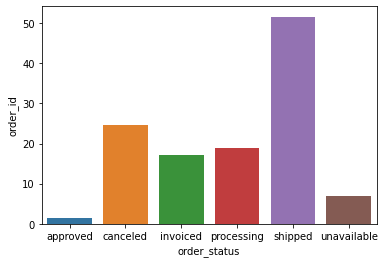

In [13]:
sns.barplot(x='order_status',y='order_id', data=mean_cancel)

## Ответ : В среднем в месяц отменяется 24.63 заказа и еще 7 имеют статус - "недоступен".
### Заказы по остальным статусами находятся в той или иной стадии выполнения и еще могут быть доставлены пользователям.

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

In [14]:
# Логичнее было взять время создания заказа, чтобы определить, когда именно люди выбирают ИМЕННО ЭТОТ заказ
# тк оплата может проходить позже и это не является именно днем, когда была болльше всего необходимость в данном продукте

In [15]:
#Количество уникальных продуктовых айди - товаров
df.product_id.nunique()

32951

In [16]:
# Создаем столбец с названиями дней недели
unique_orders['weekday'] = unique_orders['order_purchase_timestamp'].dt.day_name()
unique_orders

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,Saturday
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16,Wednesday
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04,Sunday
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07,Friday


In [17]:
# общее количество всех товаров по дням
unique_orders.groupby('weekday').agg({'product_id':'count'})

,product_id
weekday,
Friday,14002
Monday,16068
Saturday,10813
Sunday,11888
Thursday,14639
Tuesday,15831
Wednesday,15425


In [18]:
# собираем дф (из которого удалили дубликаты идентификаторы заказа) в котором будет указан день недели, продуктовый айди, и количество уникальных заказов
# Так как при первичной обработке количество продуктов в каждый день недели будет огромное количество
# отбираем только те, где количество больше 50 (чтобы за каждый день можно было увидеть хотя бы по одному товару), тк если брать 60, то в Воскресенье и в Субботу не попадало бы ни одного продукта
popular_product = unique_orders.groupby(['weekday', 'product_id']).agg({'order_id':'count'}).query('order_id > 50')
popular_product

order_id
weekday   product_id                                
Friday    422879e10f46682990de24d770e7f83d        55
          99a4788cb24856965c36a24e339b6058        70
          aca2eb7d00ea1a7b8ebd4e68314663af        69
Monday    53b36df67ebb7c41585e8d54d6772e08        56
          99a4788cb24856965c36a24e339b6058        82
          aca2eb7d00ea1a7b8ebd4e68314663af        62
          d1c427060a0f73f6b889a5c7c61f2ac4        58
Saturday  99a4788cb24856965c36a24e339b6058        58
Sunday    99a4788cb24856965c36a24e339b6058        53
Thursday  422879e10f46682990de24d770e7f83d        56
          99a4788cb24856965c36a24e339b6058        64
          aca2eb7d00ea1a7b8ebd4e68314663af        75
Tuesday   422879e10f46682990de24d770e7f83d        53
          53b36df67ebb7c41585e8d54d6772e08        69
          99a4788cb24856965c36a24e339b6058        58
          aca2eb7d00ea1a7b8ebd4e68314663af        68
Wednesday 422879e10f46682990de24d770e7f83d        52
          99a4788cb24856965c36a24e339b6058        54
          aca2eb7d00ea1a7b8ebd4e68314663af        61
          d1c427060a0f73f6b889a5c7c61f2ac4        53

## Ответ: popular_product датафрейм в котором указаны дни недели, какие продукты и сколько их выбирали в определенный день

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?  (8 баллов)

В данной задаче уместно будет считать покупку с даты оплаты заказа, есть вероятность, что оплат может быть несколько в одной неделе, а доставка может приходить в разное время. Опустим фактор возможной отмены заказа, так как из-за этого фактора изначально было принято решение считать условием покупки - доставку заказа до покупателя.


In [19]:
df.order_approved_at.dropna()

0        2017-05-16 15:22:12
1        2018-01-12 20:58:32
2        2018-05-20 16:19:10
3        2018-03-13 17:29:19
4        2018-07-29 10:10:09
                 ...        
112645   2018-04-07 16:08:45
112646   2018-04-04 08:35:12
112647   2018-04-08 20:30:03
112648   2017-11-03 21:31:20
112649   2017-12-19 18:50:39
Name: order_approved_at, Length: 112635, dtype: datetime64[ns]

In [20]:
# В этой колонке отображаем год и месяц
df['month_approved'] = df['order_approved_at'].dt.to_period('M')

In [21]:
# В этой колонке отображаем количество недель в этом месяце этого года
df['weeks_on_month'] = (df['order_approved_at'].dt.daysinmonth / 7).round(2)

In [22]:
# Отбираем для итогового датафрейма уникальный айди покупателя, месяц и год покупки, а так же количествонедель в этом месяце и смотрим на количство уникальных значений заказа
final_df = df.groupby(['customer_unique_id', 'month_approved', 'weeks_on_month'], as_index=False) \
    .agg({'order_id':'nunique'})

In [23]:
# Создаем новую колонку куда помещаем сколько покупок в среднем за одну неделю месяца делает каждый пользователь
final_df['purchases_weekly'] = round(final_df['order_id'] / final_df['weeks_on_month'], 2) 

In [24]:
final_df

,customer_unique_id,month_approved,weeks_on_month,order_id,purchases_weekly
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.23
...,...,...,...,...,...
97296,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1,0.23
97297,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1,0.23
97298,ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1,0.25
97299,ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1,0.23


## Ответ: final_df является итоговым датафреймом, который показывает количество покупок каждого полкупателя в неделю


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.. (15 баллов)

Признак формирования - <b>первая покупка</b>, очевидный признак для объединения всех пользователей

Отчетным периодом для когортного анализа будет <b>период с января по декабрь 2017</b>, так как только этот за этот год мы имеем полную статистику

Начальный период - это <b>месяц первой покупки</b> <b>(период с января по декабрь 2017)</b>

Ключевой показатель, который будем рассматривать - это <b>Retention Rate</b>

<b>Retention Rate</b> считается количество клиентов за текущий период деленное на количество клиентов за начальный период и умноженное на 100

Retention измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

In [25]:
dfs = df.query('"2016-12" < month_approved < "2018-01"')

In [26]:
df.query('"2016-12" < month_approved < "2018-01"')\
   .groupby('month_approved', as_index=False)\
   .agg({'customer_unique_id': 'count'})

,month_approved,customer_unique_id
0,2017-01,908
1,2017-02,1931
2,2017-03,3022
3,2017-04,2655
4,2017-05,4130
5,2017-06,3602
6,2017-07,4464
7,2017-08,4937
8,2017-09,4852
9,2017-10,5275


In [27]:
first_purchase = dfs.groupby('customer_unique_id', as_index = False)\
                    .agg({'month_approved': 'min'})\
                    .sort_values("month_approved")\
                    .rename(columns={'month_approved':'first_purchase_month'})
first_purchase

,customer_unique_id,first_purchase_month
2528,0ef86c70dde0066d9348655fc4e95470,2017-01
26949,9ff65289796499ec62ee319b027dcff0,2017-01
4558,1ae78cd8cf034823e5cca58266ca894e,2017-01
34369,cb923e4fcdbc3c7a091a33f5603fa9d3,2017-01
25527,975c66693ec7ce66a1a5044685f9996c,2017-01
...,...,...
7186,2a910efc136042a1dd32dc916878be40,2017-12
19812,7548a56b001c6d8c11dd5ec157002ac0,2017-12
19820,754f69cfc5e5e16096b21045cf46f86a,2017-12
38746,e58a978fc59d070baefbaea0292456eb,2017-12


In [28]:
first_purchase_group = first_purchase.groupby('first_purchase_month', as_index=False) \
    .agg({'customer_unique_id':'nunique'}) \
    .sort_values("first_purchase_month") \
    .rename(columns={"customer_unique_id" : "cohort_sizes"})
first_purchase_group

,first_purchase_month,cohort_sizes
0,2017-01,719
1,2017-02,1689
2,2017-03,2604
3,2017-04,2315
4,2017-05,3561
5,2017-06,3124
6,2017-07,3798
7,2017-08,4173
8,2017-09,4113
9,2017-10,4380


In [29]:
first_month_cohort = pd.merge (first_purchase, first_purchase_group, on='first_purchase_month')
first_month_cohort

,customer_unique_id,first_purchase_month,cohort_sizes
0,0ef86c70dde0066d9348655fc4e95470,2017-01,719
1,9ff65289796499ec62ee319b027dcff0,2017-01,719
2,1ae78cd8cf034823e5cca58266ca894e,2017-01,719
3,cb923e4fcdbc3c7a091a33f5603fa9d3,2017-01,719
4,975c66693ec7ce66a1a5044685f9996c,2017-01,719
...,...,...,...
43150,2a910efc136042a1dd32dc916878be40,2017-12,5597
43151,7548a56b001c6d8c11dd5ec157002ac0,2017-12,5597
43152,754f69cfc5e5e16096b21045cf46f86a,2017-12,5597
43153,e58a978fc59d070baefbaea0292456eb,2017-12,5597


In [30]:
dff = pd.merge(first_month_cohort, dfs, on='customer_unique_id')

In [31]:
full_cohort = dff.groupby(['first_purchase_month','month_approved', 'cohort_sizes'], as_index=False) \
    .customer_unique_id.nunique() 
full_cohort

,first_purchase_month,month_approved,cohort_sizes,customer_unique_id
0,2017-01,2017-01,719,719
1,2017-01,2017-02,719,4
2,2017-01,2017-03,719,2
3,2017-01,2017-04,719,1
4,2017-01,2017-05,719,3
...,...,...,...,...
72,2017-10,2017-11,4380,30
73,2017-10,2017-12,4380,13
74,2017-11,2017-11,7082,7082
75,2017-11,2017-12,7082,39


In [32]:
cohort = full_cohort.groupby("first_purchase_month", as_index=False).head(4)

In [33]:
cohort['retention_rate'] = round((cohort.customer_unique_id / cohort.cohort_sizes)*100, 2)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
cohort

,first_purchase_month,month_approved,cohort_sizes,customer_unique_id,retention_rate
0,2017-01,2017-01,719,719,100.00
1,2017-01,2017-02,719,4,0.56
2,2017-01,2017-03,719,2,0.28
3,2017-01,2017-04,719,1,0.14
11,2017-02,2017-02,1689,1689,100.00
12,2017-02,2017-03,1689,4,0.24
13,2017-02,2017-04,1689,4,0.24
14,2017-02,2017-05,1689,3,0.18
22,2017-03,2017-03,2604,2604,100.00
23,2017-03,2017-04,2604,13,0.50


In [35]:
cohort_pivot = cohort.pivot(index='first_purchase_month', columns='month_approved', values='retention_rate')
cohort_pivot

month_approved,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
first_purchase_month,,,,,,,,,,,,
2017-01,100.0,0.56,0.28,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,NaN,100.00,0.24,0.24,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,NaN,NaN,100.00,0.50,0.35,0.35,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,NaN,NaN,NaN,100.00,0.60,0.22,0.17,NaN,NaN,NaN,NaN,NaN
2017-05,NaN,NaN,NaN,NaN,100.00,0.53,0.48,0.39,NaN,NaN,NaN,NaN
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.35,0.38,NaN,NaN,NaN
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.53,0.34,0.18,NaN,NaN
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.67,0.36,0.26,NaN
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.66,0.49,0.34


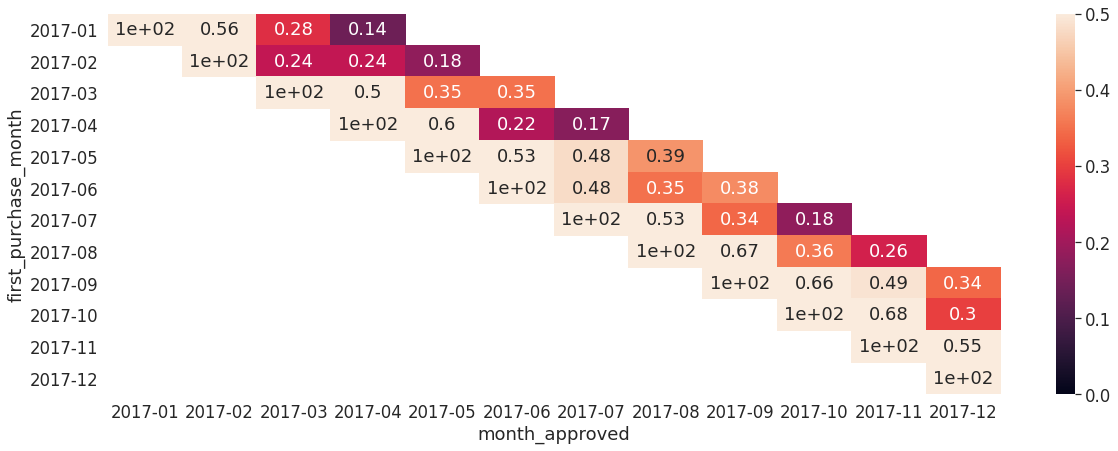

In [36]:
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
ax = sns.heatmap(cohort_pivot, vmin=0, vmax=0.5, annot=True)

### ОТВЕТ: Cамый высокий Retention Rate на 3-й месяц - 0.39% у когорты 2017-05

## 6. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.(23 балла)

In [37]:
df6 = df.groupby(['customer_unique_id', 'order_id', 'order_approved_at'], as_index = False)\
    .agg({'price': 'sum'})\
    .sort_values('price', ascending=False)
df6

,customer_unique_id,order_id,order_approved_at,price
3919,0a0a92112bd4c708ca5fde585afaa872,03caa2c082116e1d31e67e9ae3700499,2017-10-02 15:28:20,13440.00
45631,763c8b1c9c68a0229c42c9fc6f662b93,736e1922ae60d0d6a89247b851902527,2018-07-17 04:31:36,7160.00
85021,dc4802a71eae9be1dd28f5d788ceb526,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:45:12,6735.00
26862,459bef486812aa25204be022145caa62,fefacc66af859508bf1a7934eab1e97f,2018-07-27 04:05:13,6729.00
98358,ff4159b92c40ebe40454e3e6a7c35ed6,f5136e38d1a14a4dbd87dff67da82701,2017-05-26 02:45:17,6499.00
...,...,...,...,...
44262,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-07 03:45:22,2.90
72965,bd06ce0e06ad77a7f681f1a4960a3cc6,e8bbc1d69fee39eee4c72cb5c969e39d,2017-09-13 19:25:38,2.29
19119,317cfc692e3f86c45c95697c61c853a6,f1d5c2e6867fa93ceee9ef9b34a53cbf,2018-08-25 21:30:15,2.20
69293,b38211bd797f4fdd81a98b9d1754b606,6e864b3f0ec71031117ad4cf46b7f2a1,2018-04-24 20:33:18,0.85


In [38]:
# df6['order_approved_at'] = df6['order_approved_at'].dt.to_period('D') НЕ ДАЕТ СЧИТАТЬ ПРИ ПЕРЕВОДЕ ДАТЫ В ТАКОМ ФОРМАТЕ
df6['order_approved_at'] = pd.to_datetime(df6['order_approved_at']).dt.date
df6

,customer_unique_id,order_id,order_approved_at,price
3919,0a0a92112bd4c708ca5fde585afaa872,03caa2c082116e1d31e67e9ae3700499,2017-10-02,13440.00
45631,763c8b1c9c68a0229c42c9fc6f662b93,736e1922ae60d0d6a89247b851902527,2018-07-17,7160.00
85021,dc4802a71eae9be1dd28f5d788ceb526,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12,6735.00
26862,459bef486812aa25204be022145caa62,fefacc66af859508bf1a7934eab1e97f,2018-07-27,6729.00
98358,ff4159b92c40ebe40454e3e6a7c35ed6,f5136e38d1a14a4dbd87dff67da82701,2017-05-26,6499.00
...,...,...,...,...
44262,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-07,2.90
72965,bd06ce0e06ad77a7f681f1a4960a3cc6,e8bbc1d69fee39eee4c72cb5c969e39d,2017-09-13,2.29
19119,317cfc692e3f86c45c95697c61c853a6,f1d5c2e6867fa93ceee9ef9b34a53cbf,2018-08-25,2.20
69293,b38211bd797f4fdd81a98b9d1754b606,6e864b3f0ec71031117ad4cf46b7f2a1,2018-04-24,0.85


In [39]:
now = df6.order_approved_at.max()
# now = pd.to_datetime('now').normalize()
now

datetime.date(2018, 9, 3)

In [40]:
 # Определяем recency, frequency и monetary для каждого пользователя, совершившего покупку.

rfm=df6.groupby('customer_unique_id', as_index = False)\
    .agg({'order_approved_at': lambda x: (now - x.max()).days, 
          'order_id': lambda x: len(x.unique()), 
          'price': lambda x: x.sum()})\
    .rename(columns={'order_approved_at':'recency',
                     'order_id':'frequency',
                     'price': 'monetary'})

rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00


In [41]:
# from sklearn.cluster import KMeans

# X = rfm[['recency', 'frequency', 'monetary']]

# kmeans = KMeans(n_clusters=5)
# kmeans.fit(X)

# rfm['cluster'] = kmeans.predict(X)
# rfm
# cluster_summary = rfm.groupby('cluster')['recency', 'frequency', 'monetary'].describe()
# cluster_summary.reset_index()

In [43]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 97.0, 0.4: 182.0, 0.6: 272.0, 0.8: 388.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [44]:
{'recency': {0.2: 97.0, 0.4: 182.0, 0.6: 272.0, 0.8: 388.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

{'recency': {0.2: 97.0, 0.4: 182.0, 0.6: 272.0, 0.8: 388.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [51]:
# Создаем функции для присвоения рангов от 1 до 5. Чем меньше значение новизны (r) тем лучше, значения частоты (f) и денежного обращения (m) наоборот, чем больше значения  тем лучше.
# Получаем оценки r, f и m каждого клиента и объединяем в колонке rfmclass
def r_seg(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_seg(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5
    
rfm['r'] = rfm['recency'].apply(lambda x: r_seg(x))
rfm['f'] = rfm['frequency'].apply(lambda x: fm_seg(x, 'frequency'))
rfm['m'] = rfm['monetary'].apply(lambda x: fm_seg(x, 'monetary'))
rfm['rfmclass'] = rfm.r.map(str) + rfm.f.map(str) + rfm.m.map(str)
rfm

,customer_unique_id,recency,frequency,monetary,r,f,m,rfmclass,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4,414,Перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,Бездействующие
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,Бездействующие
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,Бездействующие
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5,115,Бездействующие
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312,Ложатся спать
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,3,113,Бездействующие
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00,4,1,4,414,Перспективные


In [52]:
# Добавляем стоблец с описание сегментов через регулярные выражения
segt_map = {
    r'[1-2][1-2]': 'Бездействующие', # Последняя покупка была совершена давно, и количество заказов было небольшим. Могут быть потеряны.
    r'[1-2]5': 'Не могу их потерять', # Часто покупали, но долгое время не возвращались.
    r'[1-2][3-4]': 'В зоне риска', # Покупался часто, но давным-давно. Нужно попробовать вернуть их обратно!
    r'3[1-2]': 'Ложатся спать', # Давность и частота ниже среднего. Потеряем их, если не активировать покупки повторно.
    r'33': 'Клиенты, требующие внимания', # Давность, частота и денежная стоимость выше среднего. Хотя, возможно, купил совсем недавно.
    r'41': 'Перспективные', # Недавние покупатели, но потратили не так уж много.
    r'51': 'Новые клиенты', # Покупали недавно, но не часто.
    r'[4-5][2-3]': 'Потенциальные лоялисты', # Недавние клиенты со средней частотой.
    r'[3-4][4-5]': 'Лояльные клиенты', # Покупают на регулярной основе. Отзывчивые на рекламные акции.
    r'5[4-5]': 'Чемпионы' # Покупали недавно, покупают часто и тратят больше всего
}

rfm['Segment'] = rfm['r'].map(str) + rfm['f'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,recency,frequency,monetary,r,f,m,rfmclass,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4,414,Перспективные
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Перспективные
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,Бездействующие
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,Бездействующие
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,Бездействующие
...,...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,5,115,Бездействующие
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312,Ложатся спать
95404,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,3,113,Бездействующие
95405,ffff5962728ec6157033ef9805bacc48,124,1,115.00,4,1,4,414,Перспективные


[Text(0, 0, 'Чемпионы'),
 Text(0, 0, 'Не могу их потерять'),
 Text(0, 0, 'Лояльные клиенты'),
 Text(0, 0, 'Ложатся спать'),
 Text(0, 0, 'Новые клиенты'),
 Text(0, 0, 'Перспективные'),
 Text(0, 0, 'Бездействующие')]

Text(651, 0.0, '651 (0%)')

Text(1038, 1.0, '1,038 (1%)')

Text(1223, 2.0, '1,223 (1%)')

Text(18355, 3.0, '18,355 (19%)')

Text(18494, 4.0, '18,494 (19%)')

Text(18569, 5.0, '18,569 (19%)')

Text(37077, 6.0, '37,077 (38%)')

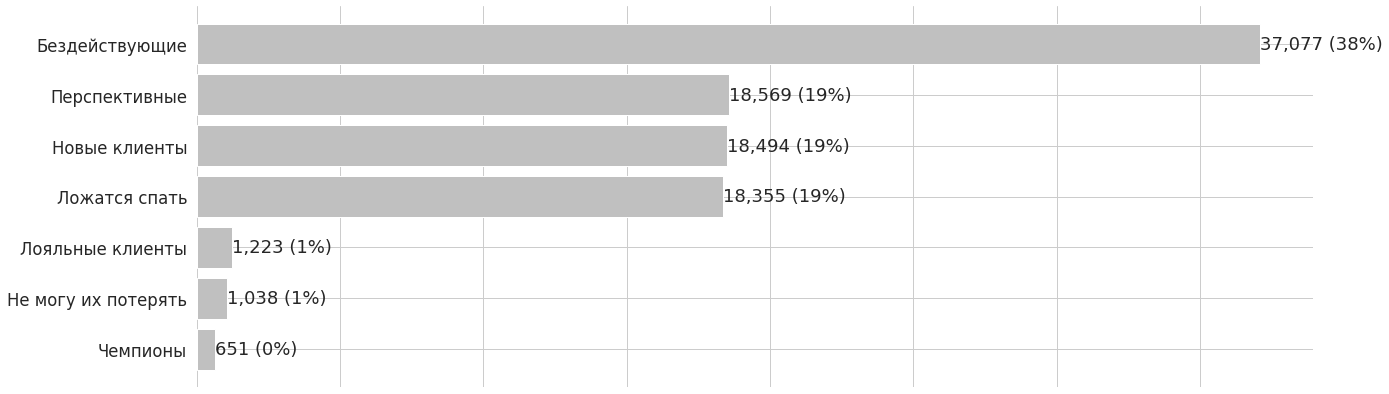

In [49]:
# Делаем визуализацию
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Ответ: таблица выше является ответом, по лояльности наших клиентов к нашему сервису